# 사이킷런을 활용한 선형 회귀
사이킷런에는 선형회귀(Linear Regression)를 쉽게 구현할 수 있도록 도와주는 여러 기능들이 있습니다.

이번 시간에는 사이킷런을 활용하여 주어진 데이터에 대한 선형 회귀를 구현하는 방법을 익혀보도록 합시다.

### 선형회귀와 관련된 사이킷런 함수/라이브러리

sklearn.linear_model.LinearRegression: 선형회귀 모델(클래스)을 불러옵니다.
linear_model = LinearRegression()

LinearRegression.fit(x, y): (x, y) 데이터셋에 대해서 모델을 학습시킵니다.

LinearRegression.predict(x): x 데이터를 바탕으로 예측되는 값을 출력합니다.

# reference:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### 실습
선형회귀와 관련된 클래스를 불러옵니다.

모델을 데이터를 기반으로 학습시킵니다.

학습이 완료되었으면, x 데이터를 바탕으로 y를 학습합니다.

x, y 수식을 바꿔보며 바뀌는 결과를 직접 확인해보세요.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


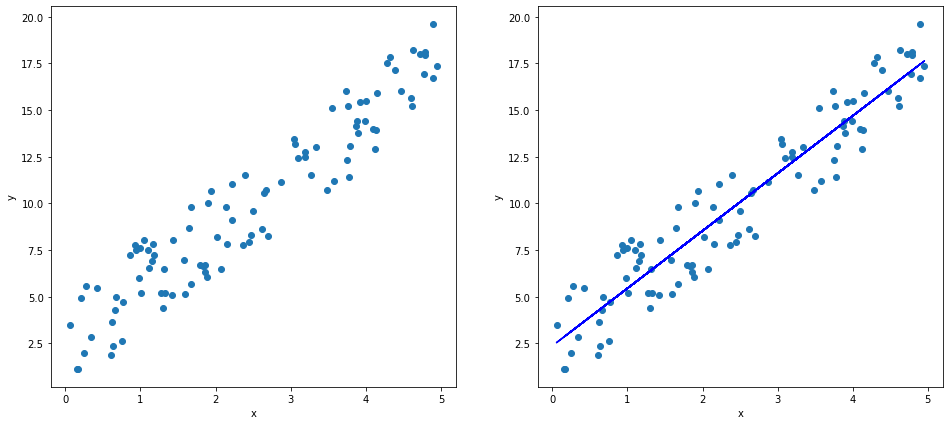

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl


import numpy as np
from sklearn.linear_model import LinearRegression

## 데이터 x와 y를 생성합니다.
x = 5*np.random.rand(100,1)
y = 3*x + 5*np.random.rand(100,1)

# 1.LinearRegression 클래스를 불러와서 회귀 모델을 만들어 봅니다.
lr = LinearRegression()
# 2.회귀 모델을 데이터 x,y에 맞추어 학습시킵니다.
LinearRegression.fit(lr,x,y)

# 3.학습된 모델을 바탕으로, 입력데이터 x의 회귀 결과를 출력합니다.
predicted = LinearRegression.predict(lr,x)

##그래프로 나타내어 봅니다.
fig, ax = plt.subplots(1,2, figsize=(16, 7))

ax[0].scatter(x,y)
ax[1].scatter(x,y)
ax[1].plot(x, predicted, color='b')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

# fig.savefig("result.png")
fig.show()

# 사이킷런을 활용한 다항 회귀
다항 회귀는 종속 변수(y)를 독립 변수(x)에 대한 임의의 다항 함수로 모델링 하는 선형 회귀를 말합니다.

이번 시간에는 이러한 다항 함수를 사이킷런을 이용하여 구현하여 봅시다.

### 유용한 함수

PolynomialFeatures(degree): Polynomial 객체를 생성합니다.
degree: 만들어줄 다항식의 차수를 의미한다.
PolynomialFeatures.fit_transform(x):x와 x의 degree제곱을 한 다항 회귀 변수를 반환한다.

### 실습
데이터 내의 각 특성 값을 제곱하여 새로운 특성(feature)을 추가하는 PolynomialFeature 객체를 생성합니다.(degree = 2, include_bias = False)
#### reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

각 데이터를 제곱하고 이를 특성에 추가시킨 후 poly_x에 저장합니다.
예: x=[0, 1, 2, 3] >> poly_x=[[0,0], [1,1], [2,4], [3, 9]])

선형회귀 모델을 생성합니다.

데이터 x,y 를 train과 evaluation(혹은 validation) 데이터로 나누어줍니다.(Train:Eval=8:2)

y_train[:i]와 pred_train 간의 평균제곱오차(mean squared errors)를 구합니다.

#### reference:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

y_eval과 pred_eval 간의 평균제곱오차(mean squared errors)를 구합니다

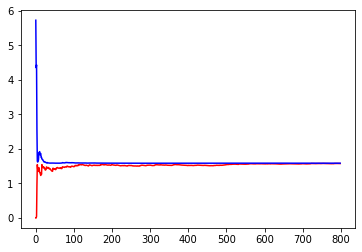

In [5]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")



## 데이터 x와 y를 생성합니다.
x = 3*np.random.rand(1000, 1) + 1
y = x**2 + x + 2 +5*np.random.rand(1000,1) 


# 1.데이터 내의 각 특성값을 제곱하여 새로운 특성(feature)을 추가하는 PolynomialFeature객체를 생성합니다.(degree=2, include_bias=False)
poly_feat = PolynomialFeatures(degree = 2, include_bias = False) 


#2.각 데이터를 제곱하고 이를 특성에 추가시킨 후 poly_x에 저장합니다.(예: x=[0, 1, 2, 3] >> poly_x=[[0,0], [1,1], [2,4], [3, 9]]) 
poly_x = poly_feat.fit_transform(x)


#3.선형회귀 모델을 생성합니다.
linear_model = LinearRegression()


# 데이터 poly_x와 y를 모델에 학습시킵니다.
linear_model.fit(poly_x, y)


# 학습률을 계산하고 이를 그래프로 표현하는 함수를 만듭니다.
def plotting_learning_curves(model, x, y):

    #4.데이터 x,y 를 train과 evaluation(혹은 validation) 데이터로 나누어줍니다.(Train:Eval=8:2)
    x_train, x_eval, y_train, y_eval = train_test_split(x,y,test_size=0.2)    
    len_train = len(x_train)
    
    train_errors=[]
    eval_errors=[]
    
    for i in range(1,len_train):
        model.fit(x_train[:i], y_train[:i])
        pred_train = model.predict(x_train[:i])
        pred_eval = model.predict(x_eval)
        
        #5.y_train[:i]와 pred_train 간의 평균제곱오차(mean_squared_errors)를 구한다.
        error_train = mse(y_train[:i],pred_train)

        #6.y_eval과 pred_eval 간의 평균제곱오차(mean_squared_errors)를 구한다.
        error_eval = mse(y_eval,pred_eval)
        
        train_errors.append(error_train)
        eval_errors.append(error_eval)
    
    plt.plot(np.sqrt(train_errors), 'r', label="train")
    plt.plot(np.sqrt(eval_errors), 'b', label="evaluation")
    
#     plt.savefig("result.png")

    
# 학습률을 계산하고 이를 그래프로 표현하는 함수를 완성했다면 함수를 실행합니다.
plotting_learning_curves(linear_model,x,y)

# 사이킷런으로 구현하는 릿지/라쏘/엘라스틱넷
사이킷런은 일반적인 선형 회귀에 대한 함수 외에 릿지(Ridge), 라쏘(Lasso), 엘라스틱넷(ElasticNet)에 대한 편리한 함수 및 기능을 제공하고 있습니다.

이번 시간에는 이러한 사이킷런의 함수들을 직접 사용해보고 익혀보도록 합시다.

# reference: 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

sklearn.linear_model.Ridge: 릿지 회귀 (클래스)를 불러옵니다.
- alpha: 설정해야 하는 변수(스칼라 값)

sklearn.linear_model.Lasso: 라쏘 회귀 (클래스)를 불러옵니다.
- alpha: 설정해야 하는 변수(스칼라 값)

sklearn.linear_model.ElasticNet: 엘라스틱넷 (클래스)를 불러옵니다.
- alpha: 설정해야 하는 변수(스칼라 값), l1_ratio: l1 norm 을 반영할 비율

[Model].fit(x, y): 데이터를 바탕으로 Model 을 학습시킵니다.

[Model].predict(x): x를 바탕으로 예측값을 출력합니다.

### 실습
릿지 회귀를 구현하고 데이터를 바탕으로 학습시킵니다.

릿지 회귀를 구현하고 데이터를 바탕으로 학습시킵니다.

엘라스틱넷을 구현하고 데이터를 바탕으로 학습시킵니다.

각 모델들을 이용하여 데이터 x에 대한 예측값을 변수에 따로 저장합니다.

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

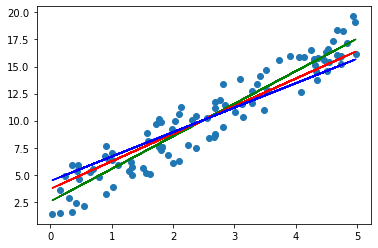

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import numpy as np

x = 5*np.random.rand(100,1)
y = 3*x + 5*np.random.rand(100,1)

#1.릿지 회귀를 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
ridge_reg = Ridge(alpha=1e-3)   #alpha: 설정해야 하는 변수(스칼라 값)
ridge_reg.fit(x,y)

#2.라쏘 회귀를 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
lasso_reg = Lasso()   #alpha: 설정해야 하는 변수(스칼라 값) alpha=1e-3
lasso_reg.fit(x,y)

#3.엘라스틱넷을 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
elastic_net =  ElasticNet()   #alpha: 설정해야 하는 변수(스칼라 값), l1_ratio: l1 norm 을 반영할 비율
elastic_net.fit(x,y)

#4.각 모델들을 이용하여 데이터 x에 대한 예측값을 변수에 따로 저장합니다.
ridge_y_pred = ridge_reg.predict(x)
lasso_y_pred = lasso_reg.predict(x)
elastic_y_pred = elastic_net.predict(x)


## 그래프로 나타내어 봅니다.
plt.scatter(x, y)

## 릿지 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,ridge_y_pred, color='green')

## 라쏘 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,lasso_y_pred, color='red')

## 엘라스틱넷 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,elastic_y_pred, color='blue')

#그래프를 확인합니다.
# plt.savefig("result.png")
plt

# 당뇨 진행상황을 선형 회귀로 예측 해보기
선형 회귀는 독립 변수를 바탕으로 종속 변수를 예측하는 여러 과제에 적용이 가능합니다.

이번 시간에는 사이킷런에서 제공하는 데이터셋 중 하나인 당뇨(diabeties) 예측 데이터셋을 바탕으로 선형 회귀를 진행해보고 그 결과를 시각화해 보도록 합시다.

### 실습
불러온 입력값과 결과값을 train 데이터와 test 데이터로 나눕니다.(train - 80% / test - 20%)

모델을 데이터(input_train, input_label)에 대하여 학습시킵니다.

테스트 입력데이터(input_test)에 대해서 학습 모델의 예측을 실행합니다.

실제값(label)과 예측값(pred) 간의 오차(평균제곱오차)를 출력하는 함수를 정의하고 출력합니다.

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")

import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error as mse

## 당뇨병 관련 데이터셋을 불러옵니다.
train_data = ds.load_diabetes()

## 불러온 데이터셋에서 입력값(input)과 결과값(label)값을 불러오고 각각 변수에 저장합니다.
    ## 입력값(input)은 sklearn.preprocessing.normalize를 사용해서 값을 Normalize 합니다.
_input, _label = [normalize(train_data['data']), train_data['target']]

#1.불러온 입력값과 결과값을 train 데이터와 test 데이터로 나눕니다.(train - 80% / test - 20%)
input_train, input_test, label_train, label_test = train_test_split(_input, _label, test_size=0.2)

#선형회귀(LinearRegression) 모델을 불러옵니다.
linear_model = LinearRegression()

#2.선형회귀 모델을 데이터(input_train, label_train)에 대하여 학습시킵니다.
linear_model.fit(input_train, label_train)

#3.테스트 입력데이터(input_test)에 대해서 학습 모델의 예측을 실행합니다.
pred = linear_model.predict(input_test)

#4.실제값(label)과 예측값(pred) 간의 오차(평균제곱오차)를 출력하는 함수를 정의하고 출력합니다.
def get_mse(label,pred):
    # error=(label=pred)**2
    error=mse(label,pred)
    return error 

print('MSE(평균제곱오차): ', get_mse(label_test, pred)) 

MSE(평균제곱오차):  3353.4098395825345


# 보스턴 주택가격 예측
회귀는 여러 요인들과 특정 종속 변수 간의 관계를 예측하는 것으로써, 이를 통해 주가 예측 등 여러 예측 과제를 수행할 수 있습니다.

이번 시간에는 사이킷런 라이브러리에 내장되어 있는 데이터셋 중 하나인 Boston Data(보스턴 주택가격 예측을 위한 데이터)를 이용해 보겠습니다. 여러 변수들을 바탕으로 주택 가격(PRICE)을 예측하는 회귀 모델을 만들고 평가하여 봅시다.

### 유용한 함수들

sklearn.metrics.mean_squared_error: 두 값의 차의 제곱을 구합니다.

np.sqrt(x): x의 제곱근을 구합니다.

linear_model.coef_ : 선형모델의 상관계수를 출력합니다.

### 코드 구성

이번 예제의 코드는 함수의 형태로 구성되어 있습니다. 함수형 코드 구성은 입력을 받아 결과를 출력하는 형태의 함수들로 코드를 구성하고 전개하는 것을 말합니다.

코드가 길어지거나 반복되는 경우, 함수의 형태로 코드를 구성하는 것이 효율성이나 가독성 면에서 더 적합하다고 할 수 있습니다.

- load_data(): 데이터를 불러옵니다.
- load_data_target(dataset): 데이터셋을 data와 target을 합하여 DataFrame을 만들고 반환합니다.
- plotting_graph(DataFrame): 데이터를 시각화한다.
- data2train_eval(DataFrame): 데이터를 Test와 Validation으로 나누어주는 함수를 만들어 봅니다.
- main(): 위의 함수들을 이용하여 선형회귀를 진행합니다. (전체 진행되는 과정을 main함수 안에서 확인할 수 있습니다.)

### 실습
만들어준 DataFrame에 'PRICE’변수를 추가하고, target 데이터를 넣어준다.

Matplotlib.pyplot의 Subplots를 이용하여 2행 4열의[figsize=(16,8)] 그래프를 생성합니다.

학습 데이터를 바탕으로 학습을 진행합니다.

검증 데이터를 바탕으로 값을 예측합니다.

검증 데이터의 제곱 평균 오차(mean squared error)를 계산합니다.

MSE: 21.175, RMSE: 4.602
회귀 계수값: [ -0.1   0.   -0.    2.5 -22.9   2.8   0.   -1.6   0.4  -0.   -0.9   0.
  -0.6]
RM          2.8
CHAS        2.5
RAD         0.4
B           0.0
TAX        -0.0
AGE         0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.6
NOX       -22.9
dtype: float64


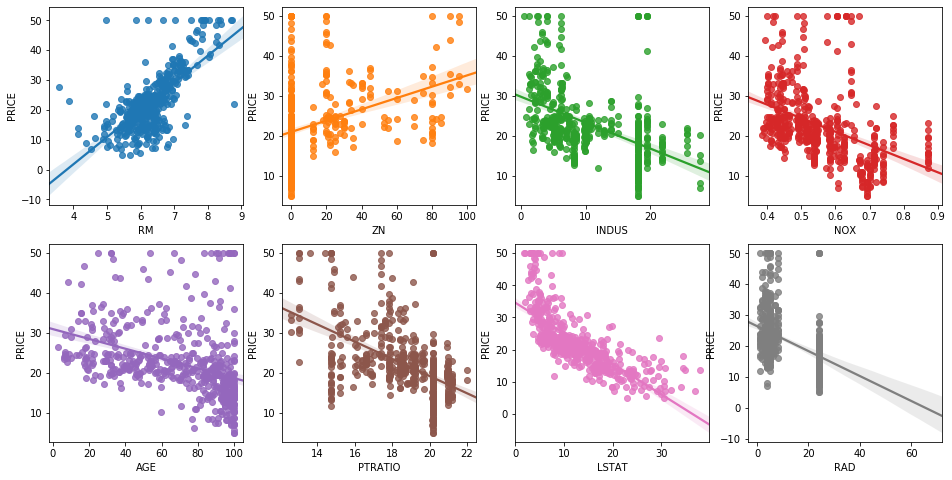

In [14]:
from scipy import stats
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mser

##데이터를 불러오는 함수를 만들어 봅니다.
def load_data():
    return datasets.load_boston()


##데이터셋에 data과 target 합한 DataFrame을 반환하는 함수를 만들어 봅니다.
def load_data_target(dataset):
    
    ##데이터셋의 Data를 DataFrame으로 만들어 줍니다.
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    #1.만들어준 DataFrame에 'PRICE'변수를 추가하고, target 데이터를 넣어준다.
    df['PRICE'] = dataset.target
    return df


##데이터를 Seaborn을 이용하여 시각화한다.
def plotting_graph(df):
    #2.Matplotlib.pyplot의 Subplots를 이용하여 2행 4열의[figsize=(16,8)] 그래프를 생성합니다.
    fig, axs = plt.subplots(2,4, figsize=(16, 8))
    ##특징들의 이름을 설정합니다.
    features = ['RM','ZN','INDUS','NOX','AGE', 'PTRATIO', 'LSTAT', 'RAD']
    
    ##Seaborn을 이용하여 특징들과 그 인덱스를 바탕으로 데이터를 시각화 합니다.
    for i, feature in enumerate(features):
        row = int(i/4)
        col = i%4
        ##seaborn.replot을 이용하여 변수와 그에 따른 Regression 그래프를 그려줍니다.
        sns.regplot(x = feature, y = 'PRICE', data = df, ax=axs[row][col])
    fig    
#     fig.savefig("result.png")

##데이터를 train/validation 데이터로 나누어주는 함수를 만들어 봅니다.
def data2train_eval(df):
    label_data = df['PRICE']
    input_data = df.drop(['PRICE'], axis=1, inplace=False)
    
    input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.3, random_state=432)
    
    return input_train, input_eval, label_train, label_eval


##정의된 함수를 바탕으로 데이터를 분리하고 회귀(Regression)를 진행합니다.
def main():
    ## 데이터를 불러옵니다.
    df = load_data()
    ## 불러온 데이터를 DataFrame으로 추가시켜 줍니다.
    df_data_target = load_data_target(df)
    ## (Seaborn)그래프를 띄워서 변수 별로 대략적인 Regression이 어떻게 되는지 확인하여 봅니다.
    plotting_graph(df_data_target)

    input_train, input_eval, label_train, label_eval = data2train_eval(df_data_target)
    
    ## 회귀모델을 생성합니다.
    linear_model = LinearRegression()
    # 3.학습 데이터를 바탕으로 학습을 진행합니다.
    linear_model.fit(input_train, label_train)
    # 4.검증 데이터를 바탕으로 값을 예측합니다.
    pred = linear_model.predict(input_eval)
    # 5.검증 데이터의 제곱 평균 오차(mean squared error)를 계산합니다.
    mse = mser(pred,label_eval)
    ## 검증 데이터의 루트 제곱 평균 오차(rooted mean squared error)를 계산합니다.
    rmse = np.sqrt(mse)


    print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
    #LinearRegression 모델의 상관계수를 구하고 출력합니다.
    print('회귀 계수값:', np.round(linear_model.coef_, 1))
    # 구한 상관계수를 큰 순서대로 출력합니다.
    coeff = pd.Series(data = np.round(linear_model.coef_, 1), index=input_train.columns)
    print(coeff.sort_values(ascending=False))
    
main()

# 선형 회귀 직접 구현하기
선형 회귀는 종속 변수 y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법을 말합니다.

이번 시간에는 y와 x가 주어졌을 때, ‘y = ax+b’ 라는 형태의 직선을 회귀식으로 하는 단순한 선형 회귀(Linear Regression) 파이썬을 통해 직접 구현해보도록 합시다.

### 선형 회귀의 절차

x라는 값이 입력되면 'ax+b’라는 계산식을 통해 값을 산출하는 예측 함수를 정의합니다.

예측 함수를 통해 예측값과 실제 값 y 간의 차이를 계산합니다.

a와 b를 업데이트하는 규칙을 정의하고 이를 바탕으로 a와 b의 값을 조정합니다.

위의 과정을 특정 반복 횟수 만큼 반복합니다.

반복적으로 수정된 a와 b를 바탕으로 ‘y=ax+b’라는 회귀식을 정의합니다

### 미션
Numpy 배열 a, b, x 를 받아서 'ax+b’를 계산하는 prediction 함수를 정의합니다.(Numpy 활용)

실제값(y)과 예측값의 차이를 계산하여 error를 정의합니다.

본문 내에서 정의한 함수를 이용하여 a와 b값의 변화값을 저장합니다.

a: [[0.64716734]] b: [[0.96099787]]


(array([[0.64716734]]), array([[0.96099787]]))

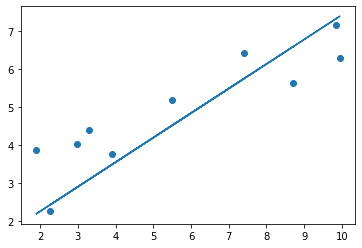

In [15]:
# 참고: https://anujdutt9.github.io/ML_LRGrdientDescent.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")
learning_rate = 1e-4
iteration = 10000

x = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])

##입력값(x)과 변수(a,b)를 바탕으로 예측값을 출력하는 함수를 만들어 봅니다.
def prediction(a,b,x):
    #1.Numpy 배열 a,b,x를 받아서 'x*(transposed)a + b'를 계산하는 식을 만듭니다.
    equation = np.dot(x,a.T)+b    
    return equation

##변수(a,b)의 값을 어느정도 업데이트할 지를 정해주는 함수를 만들어 봅니다.
def update_ab(a,b,x,error,lr):
    ## a를 업데이트하는 규칙을 만듭니다..
    delta_a = -(lr*(2/len(error))*(np.dot(x.T, error)))
    ## b를 업데이트하는 규칙을 만듭니다.
    delta_b = -(lr*(2/len(error))*np.sum(error))
    
    return delta_a, delta_b

# 반복횟수만큼 오차(error)를 계산하고 a,b의 값을 변경하는 함수를 만들어 봅니다.
def gradient_descent(x, y, iters):
    ## 초기값 a= 0, b=0
    a = np.zeros((1,1))
    b = np.zeros((1,1))    
    
    for i in range(iters):
        #2.실제 값 y와 prediction 함수를 통해 예측한 예측값의 차이를 error로 정의합니다.
        error = y - prediction(a,b,x)
        #3.위에서 정의한 함수를 이용하여 a와 b 값의 변화값을 저장합니다.
        a_delta, b_delta = update_ab(a,b,x,error,learning_rate)
        ##a와 b의 값을 변화시킵니다.
        a -= a_delta
        b -= b_delta
    
    return a, b

##그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,a,b):
    y_pred=a[0,0]*x+b
    plt.scatter(x, y)
    plt.plot(x, y_pred)
#     plt.savefig("test.png")
    plt

##실제 진행 절차를 확인할 수 있는 main함수 입니다.
def main():
    a, b = gradient_descent(x, y, iters=iteration)
    print("a:",a, "b:",b)
    plotting_graph(x,y,a,b)
    return a, b

main()